### Core Machine Learning Concepts

##### Supervised Learning vs. Unsupervised Learning

Supervised Learning: We have both input data (features) and the output (labels). The model learns to predict outputs for new inputs.

Example: Predicting house prices (features: area, bedrooms; label: price).


Unsupervised Learning: No labels, only input data. The model identifies patterns, like clustering customers into groups.

Example: Grouping customers based on purchasing behavior.

In [1]:
# Import libraries
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display data
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


##### Supervised Learning Basics

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a sample dataset
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = iris.target  # Species

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.16997965789997332


Logistic Regression for Classification

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9


##### Advanced Supervised Learning

Decision Tree for Classification

[Text(167.4, 190.26, 'X[0] <= 5.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(83.7, 135.9, 'X[1] <= 2.8\ngini = 0.274\nsamples = 44\nvalue = [37, 6, 1]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 5.35\ngini = 0.053\nsamples = 37\nvalue = [36, 1, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 6.15\ngini = 0.536\nsamples = 76\nvalue = [3, 35, 38]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 3.7\ngini = 0.503\nsamples = 34\nvalue = [3, 22, 9]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.412\nsamples = 31\nvalue = [0

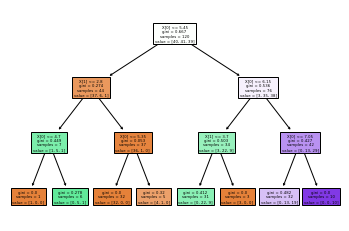

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Train a decision tree
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# Visualize the decision tree
tree.plot_tree(dt_model, filled=True)


##### Support Vector Machines

In [5]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")


SVM Accuracy: 0.9


##### Model Performance Optimization

In [6]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-validation
scores = cross_val_score(log_model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")

# Grid search for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best Parameters: {grid.best_params_}")


Cross-validation scores: [0.73333333 0.83333333 0.76666667 0.86666667 0.86666667]
Best Parameters: {'C': 0.1}


##### Unsupervised Learning

In [9]:
# K-means Clustering

from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the data
df['Cluster'] = kmeans.labels_
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


##### Dimensionality Reduction with PCA

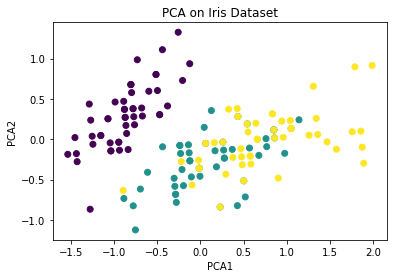

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA on Iris Dataset')
plt.show()


##### Random Forest for Classification

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.7666666666666667
